# CUSTOMER CHURN PREDICTION
## Customer Churn Prediction using classification machine learning model to predict a customer will Churn or not Churn

## About the project
### Churn can be defined as customer who stop, discontinue, or unsubscribe to a service or business. On a business, maintaining a customer is a really important thing to do, yet it could be really hard. One way to predict customer behavior is to analyse customer based on data. In the era of Big Data and Machine Learning, we can learn about customer and analyse customer behaviour pattern to do a prediction.
### By building a model, companies can predict customer who're at high risk of churn, and find new strategy to maintain customers. 

### Objective:
Exploring and Analyze data and try to answer some question such as:
- What feature shows correlation to Churn Rate?
- Does the churn rate on the dataset skewed?
- How different the behaviour of customer who churned and don't?
Model Building and Metric:
- Whats the best accuracy of the model?
- What model predict the best?

## TABLE OF CONTENT
- THE DATASET
- DATA CLEANING
- EXPLORATORY DATA ANALYSIS (EDA)
- FEATURE SELECTION AND PREPROCESSING
- TRAIN-TEST SPLIT
- MODEL BUILDING
- MODEL COMPARISION

In [1]:
# library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# THE DATASET

Dataset sourced from IBM Telco Customer dataset, which uploaded on kaggle by BlastChar: https://www.kaggle.com/blastchar/telco-customer-churn

The dataset contain 21 column consist of customer ID, Churn status, and 19 feature/attributes of the customer.

In [2]:
# load data
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


dataset consist of 7043 row (customer) with 21 column (features) described as:
- customerID        : unique id for each customer
- gender            : gender of customer
- SeniorCitizen     : whether the customer is a senior citizen (yes/no)
- Partner           : whether the customer has a partner or not
- Dependents        : whether the customer has a dependent or not 
- tenure            : month count of customer has stayed on the company
- PhoneService      : whether the customer has a phone service or not
- MultipleLines     : whether the customer has multiple lines or not
- InternetService   : customer's ISP (internet service provider)
- OnlineSecurity    : whether the customer has online security or not
- OnlineBackup      : whether the customer has online backup or not
- DeviceProtection  : whether the customer has device protection or not
- TechSupport       : whether the customer has tech support or not
- StreamingTV       : whether the customer has streaming tv or not
- StreamingMovies   : whether the customer has streaming movies or not
- Contract          : contract term of customer
- PaperlessBilling  : whether the customer has paperless billing or not
- PaymentMethod     : customer's payment method
- MonthlyCharges    : customer's amount of charges monthly
- TotalCharges      : total amount of customer's charges
- Churn             : whether the customer churned or not

# DATA CLEANING

'TotalCharges' is a numerical data, but it listed as object, lets convert it

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
# drop null value
df = df.dropna(axis=0, how='any')

# drop customer id
df = df.drop(['customerID'], axis=1)

In [6]:
# check categorical data 
for col in df:
    print(col , "\n" , df[col].unique() , "\n")

gender 
 ['Female' 'Male'] 

SeniorCitizen 
 [0 1] 

Partner 
 ['Yes' 'No'] 

Dependents 
 ['No' 'Yes'] 

tenure 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService 
 ['No' 'Yes'] 

MultipleLines 
 ['No phone service' 'No' 'Yes'] 

InternetService 
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity 
 ['No' 'Yes' 'No internet service'] 

OnlineBackup 
 ['Yes' 'No' 'No internet service'] 

DeviceProtection 
 ['No' 'Yes' 'No internet service'] 

TechSupport 
 ['No' 'Yes' 'No internet service'] 

StreamingTV 
 ['No' 'Yes' 'No internet service'] 

StreamingMovies 
 ['No' 'Yes' 'No internet service'] 

Contract 
 ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling 
 ['Yes' 'No'] 

PaymentMethod 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges 
 [29

looks like categorical data all clean (no noise value) and numerical data also has right data types. we're good to go to the next step

# EXPLORATORY DATA ANALYSIS (EDA)

### essential function

In [7]:
# print average
def printAvg(df, col):
    print("Average: " + str(df[col].mean()))

In [8]:
# countplot figure
def fig_countplot(df, col, sort):
    fig = plt.figure(figsize=(7, 4))
    fig.set_facecolor('white')
    if (sort): ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    else: ax = sns.countplot(data=df, x=col, palette='Set2')
    ax.set_title(col, fontsize=20)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=14)
    plt.show()

In [9]:
# kdeplot figure
def fig_kdeplot(df, col):
    fig = plt.figure(figsize=(9,5))
    fig.set_facecolor('white')
    ax = df[col].hist(bins=10, density=False, alpha=0.5, color='purple')
    ax = sns.kdeplot(data=df, x=col, shade=False, alpha=0.9, linewidth=2)
    ax.set_title(col, fontsize=20)
    plt.show()

In [10]:
# kdeplot figure yn
def fig_kdeplot_yn(df, col):
    fig = plt.figure(figsize=(9, 5))
    fig.set_facecolor('white')

    ax = sns.kdeplot(data=df, x=(df[col][df['Churn'] == 'Yes']), shade=True, alpha=0.2, linewidth=2, color='red')
    ax = sns.kdeplot(data=df, x=(df[col][df['Churn'] == 'No']), shade=True, alpha=0.2, linewidth=2, color='blue')
    
    ax.set_title(col, fontsize=20)
    ax.legend(['Churn', 'Not Churn'], loc='upper right')
    plt.show()

In [11]:
def fig_countplot_yn(df, col):
    fig = plt.figure(figsize=(9,5))
    fig.set_facecolor('white')
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='flare')
    
    # percentage
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")

    plt.show()

In [12]:
# boxplot figure
def fig_boxplot(df,col):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.boxplot(df[col])
    ax.set_title(col, fontsize=20)
    plt.show()

In [13]:
# print percentage of categorical data
def print_percentage(df, col):
    print(df[col].value_counts()/df[col].count()*100)

In [14]:
# print percentage of churn vs not churn 
def print_percentage_yn(df, col):
    print("Churn: ")
    print((df[col][df['Churn'] == 'Yes'].value_counts()/df[col].count())*100)
    print("Not Churn: ")
    print((df[col][df['Churn'] == 'No'].value_counts()/df[col].count())*100)

In [15]:
# pie chart
def fig_piechart(df, col):
    fig = plt.figure(figsize=(5,5))
    fig.set_facecolor('white')
    colors = ['#ffcc99', '#ff6666', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6']
    ax = (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors)
    ax.set_title(col)
    plt.show()

In [16]:
def fig_sub_pie(df, col):
    fig, ax = plt.subplots(1, 2, sharey=False, figsize=(9, 5))
    fig.set_facecolor('white')

    # pieplot
    fig.set_facecolor('white')
    colors = ['#ffcc99', '#ff6666', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6']
    (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors, ax=ax[0])
    
    # countplot
    sns.countplot(data=df, x=col, hue='Churn', palette='flare', ax=ax[1])
    # percentage on countplot
    bars = ax[1].patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax[1].text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
        ax[1].text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")

    
    plt.tight_layout()
    plt.show()

In [17]:
def fig_sub_count(df, col):
# for col in demographic:
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
    fig.set_facecolor('white')
    
    sns.countplot(data=df, x=col, palette='Accent', ax=ax[0])
    sns.countplot(data=df, x=col, hue='Churn', palette='flare', ax=ax[1])
    
    # percentage
    for i in range(2):
        bars = ax[i].patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]

        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            ax[i].text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
            ax[i].text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")
    
    plt.show()
    # print_percentage(df, col)
    # print_percentage_yn(df, col)

In [18]:
def fig_scatterplot(df, col1, col2):
    colors = np.random.rand(len(df[col1]))
    fig = df[[col1, col2]].plot.scatter(x=col1, y=col2, c='purple', alpha=0.3)
    fig.set_facecolor('white')
    plt.show()

### Analysis on Churn (target)
### Q: whats the distrubution of Churn vs Not Churn among the customer in dataset?

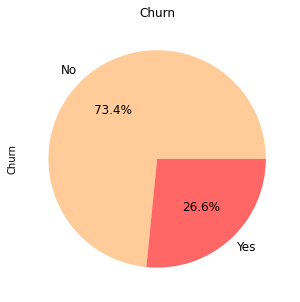

In [19]:
fig_piechart(df, 'Churn')

73,4 customer not churned. The dataset is skewed, but its normal since on a business, we expect there's more customer who stayed. However, this skewness can lead to false negatives. we will be handling this skewness in preprocessing step after we do EDA on other features.

to make it simpler, I divided the feature  to category as:

- charges     : ['tenure', 'MonthlyCharges', 'TotalCharges']
- demographic : ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
- phone       : ['PhoneService', 'MultipleLines']
- internet    : ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
- payment     : ['Contract', 'PaperlessBilling', 'PaymentMethod']

In [20]:
charges = ['tenure', 'MonthlyCharges', 'TotalCharges']
demographic = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
phone = ['PhoneService', 'MultipleLines']
internet = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
payment = ['Contract', 'PaperlessBilling', 'PaymentMethod']

### Analysis on charges (tenure, MonthlyCharges, TotalCharges)
tenure, MonthlyCharges, TotalCharges is numerical data type of charges from user
### Q: Whats the distribution of tenure, MonthlyCharges, TotalCharges? How they vary between customer Churn and Not Churn?

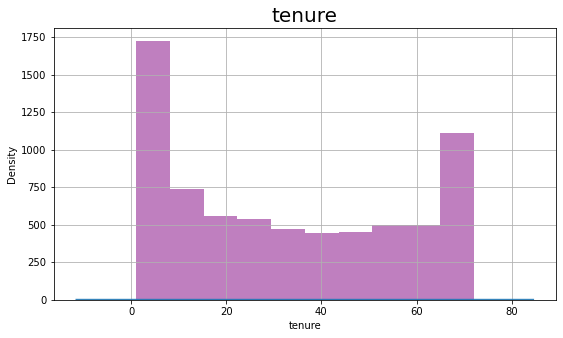

Average: 32.421786120591584


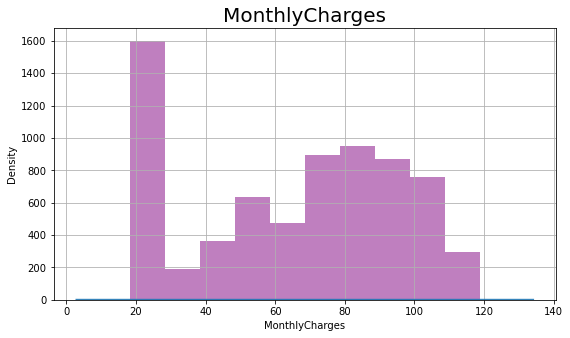

Average: 64.79820819112632


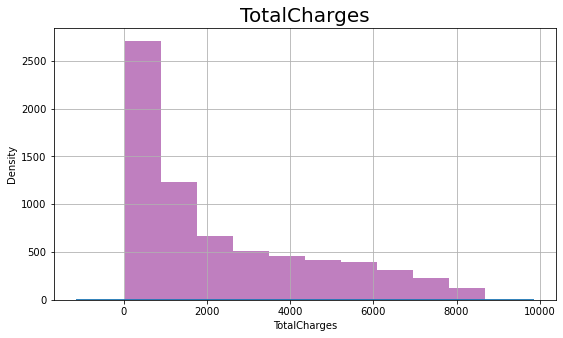

Average: 2283.3004408418697


In [21]:
for col in charges:
    fig_kdeplot(df, col)
    printAvg(df, col)

- tenure distribution skewed, with most density at 10-15 and 60-70.
- MonthlyCharges distribution also skewed, with most density at 20-25.
- TotalCharge density most dense at 0-1000 and tend to lower as the TotalCharges higher.

lets see how the distribution vary for 'Churn' and 'Not Churn'

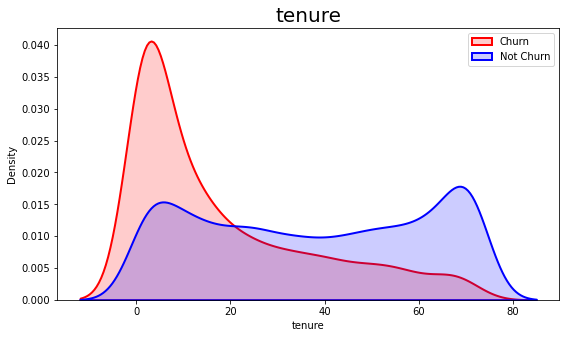

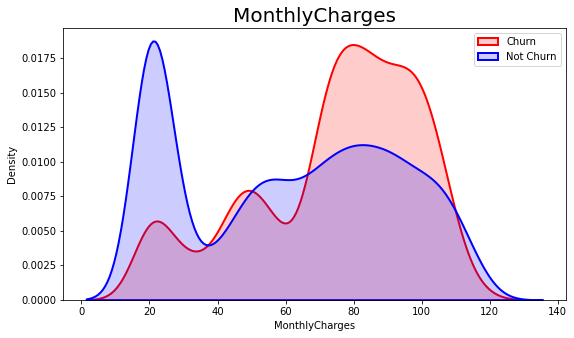

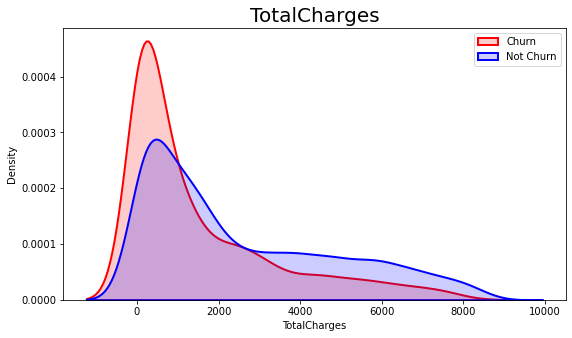

In [22]:
for col in charges:
    fig_kdeplot_yn(df, col)

- customer who churned tend to have tenure on 0-20
- customer who churned tend to have higher MonthlyCharges, while customer who not churned tend to have lower Monthly Charges
- there's no pattern on TotalCharges. both customer who churn and not churn tend to have lower TotalCharges between 0-2000. There's slightly higher density on higher TotalCharges on customer who not churn, but still mostly on lower TotalCharges.

Lets see the relationship between MonthlyCharges and TotalCharges

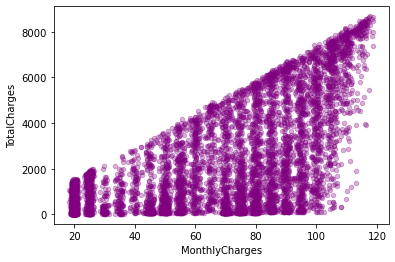

In [23]:
fig_scatterplot(df, 'MonthlyCharges', 'TotalCharges')

there are linear relationship, where bigger the Monthly Charges, bigger the Total Charges, which was normal.

### Analysis on demographic (gender, SeniorCitizen, Partner, Dependents)
### Q: What is the majority gender of customer? Do one gender tend to Churn?
### Q: How many SeniorCitizen customer among customer?
### Q: Do having partner and dependents effect to churn rate?

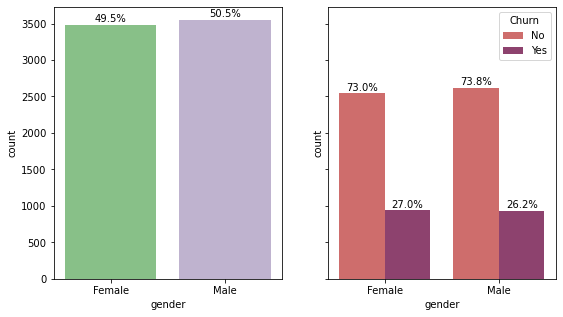

In [24]:
fig_sub_count(df, 'gender')

female and male customer count balanced and Churn ratio also similar, this mean there's no majority gender on customer and one gender don't tend to Churn.

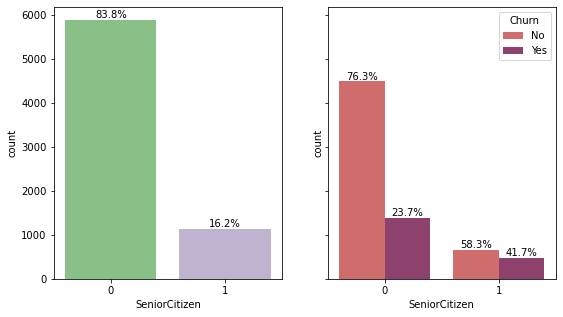

In [25]:
fig_sub_count(df, 'SeniorCitizen')

most of customer wasn't a senior citizen. however, senior citizen has more churn rate then customer who are not a senior citizen.

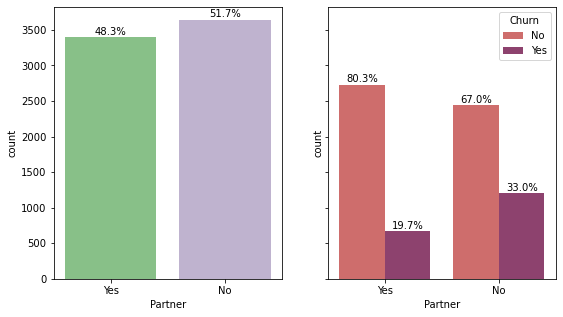

In [26]:
fig_sub_count(df, 'Partner')

customer who has and doesn't has partner count is balanced. customer who don't has partner show slightly higher churn rate.

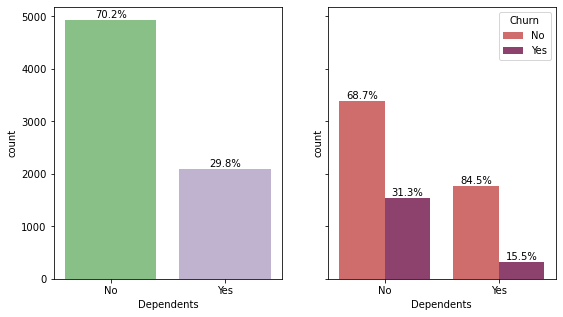

In [27]:
fig_sub_count(df, 'Dependents')

most customer doesn't have dependents. customer who has dependents shows lower churn rate the customer who don't

### Analysis on phone (PhoneService, MultipleLines)
### Q: Do using Phone Service or Multiple Lines effect churn rate?

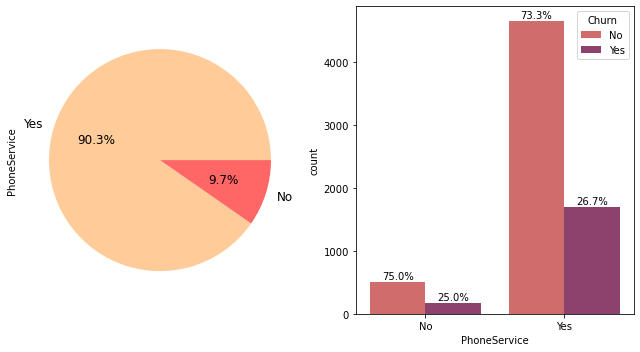

In [28]:
fig_sub_pie(df, 'PhoneService')

majority of customer have PhoneService, there's no significant churn ratio deferences between customer who have Phone Service or not

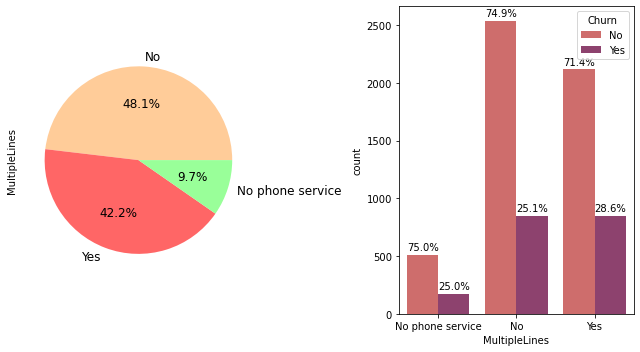

In [29]:
fig_sub_pie(df, 'MultipleLines')

out of 90,3% customer who have Phone Service, half of them used MultipleLines and others don't. There's also ni significant churn ratio differences between cutomer who used Multiple Lines and not

### Analysis on internet (InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)
### Q: Do internet services and other internet feature effect churn rate? How many customer registered to the service?

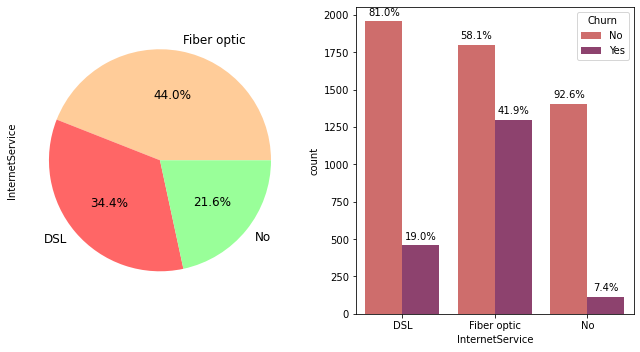

In [30]:
fig_sub_pie(df, 'InternetService')

customer who used fiber optic shows more churn rate than the other two, with customer who didn't use internet service has the lowest churn rate

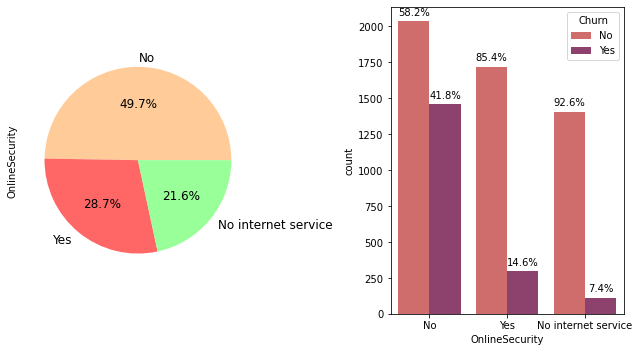

In [31]:
fig_sub_pie(df, 'OnlineSecurity')

half of the customer don't used OnlineSecurity, and has the highest churn rate.

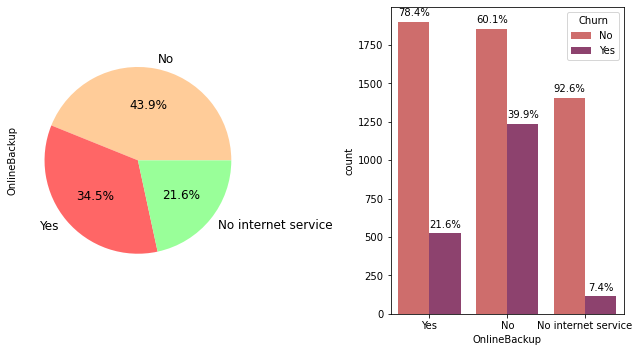

In [32]:
fig_sub_pie(df, 'OnlineBackup')

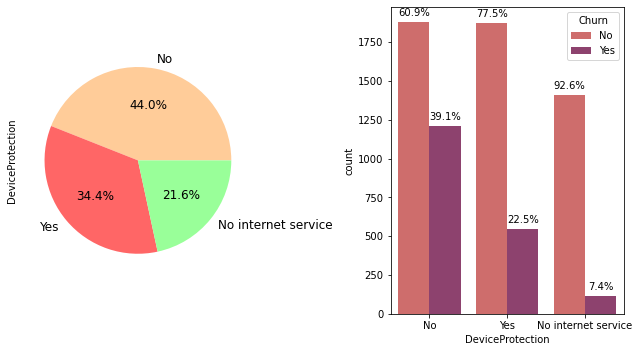

In [33]:
fig_sub_pie(df, 'DeviceProtection')

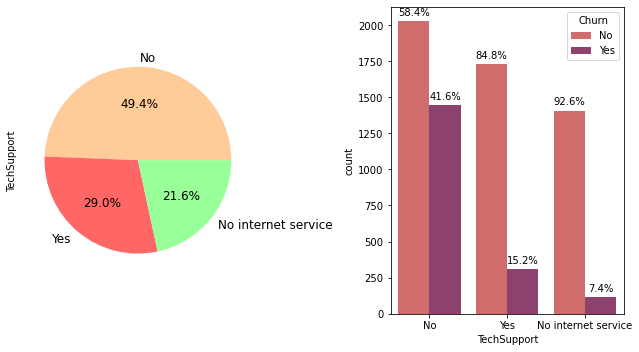

In [34]:
fig_sub_pie(df, 'TechSupport')


half of customer has no tech support and 41,6% of customer with no tech support churned. this comparision is so big compared to customer with tech support with only 15,2& churn rate

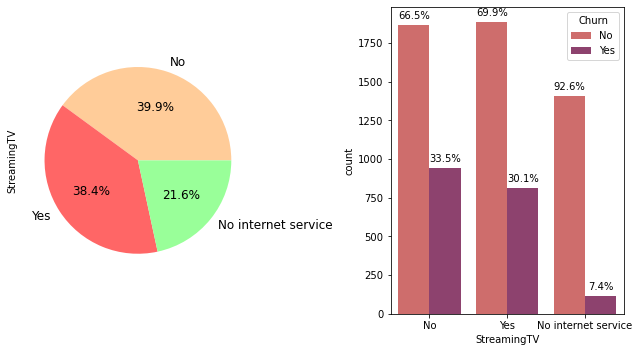

In [35]:
fig_sub_pie(df, 'StreamingTV')

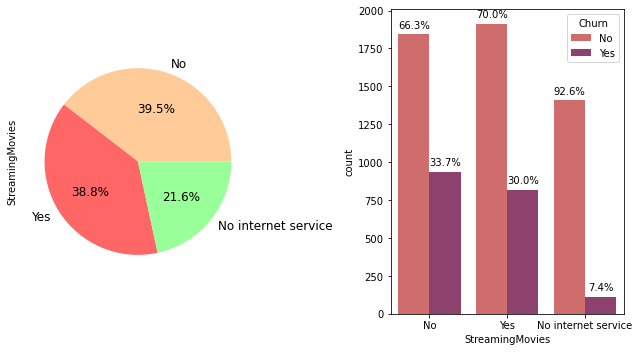

In [36]:
fig_sub_pie(df, 'StreamingMovies')

### Analysis on payment (Contract, PaperlessBilling, PaymentMethod)
### Q: how payment effect churn rate? whats the relation between payment and tenure?
### Q: hows the relationship of Contract to tenure?

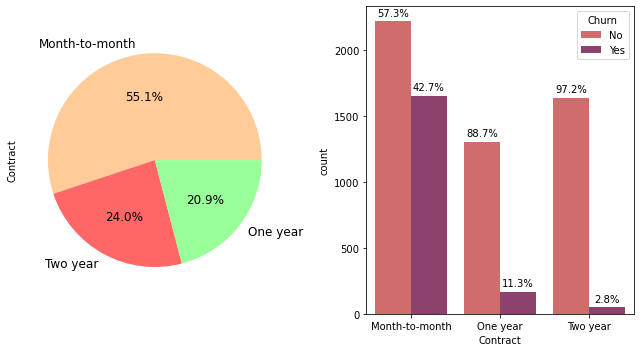

In [37]:
fig_sub_pie(df, 'Contract')

month-to-month contract being a majority, and with the highest churn rate od 42,7% meanwhile one year contract has 11.3% churn rate and two year only 2,8% churn rate. this show loyal customer tend to make contract with longer period.

lets see how contract relationship with tenure

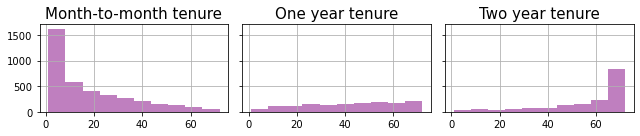

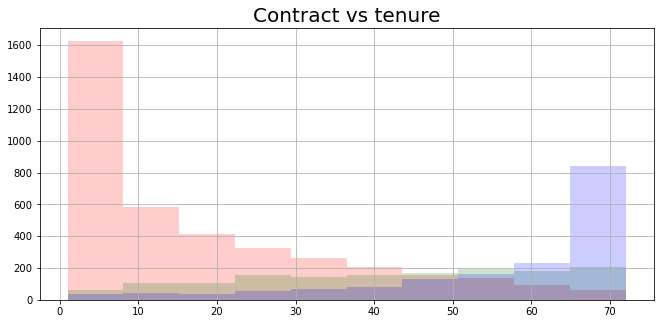

In [38]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(9, 2))
fig.set_facecolor('white')
(df[df['Contract'] == 'Month-to-month']['tenure']).hist(bins=10, density=False, alpha=0.5, color='purple', ax=ax[0])
(df[df['Contract'] == 'One year']['tenure']).hist(bins=10, density=False, alpha=0.5, color='purple', ax=ax[1])
(df[df['Contract'] == 'Two year']['tenure']).hist(bins=10, density=False, alpha=0.5, color='purple', ax=ax[2])
ax[0].set_title('Month-to-month tenure', fontsize=15)
ax[1].set_title('One year tenure', fontsize=15)
ax[2].set_title('Two year tenure', fontsize=15)
plt.tight_layout()
plt.show()

axs = plt.figure(figsize=(11,5))
axs = (df[df['Contract'] == 'Month-to-month']['tenure']).hist(bins=10, density=False, alpha=0.2, color='red')
axs = (df[df['Contract'] == 'One year']['tenure']).hist(bins=10, density=False, alpha=0.2, color='green')
axs = (df[df['Contract'] == 'Two year']['tenure']).hist(bins=10, density=False, alpha=0.2, color='blue')
axs.set_title('Contract vs tenure', fontsize=20)
plt.show()


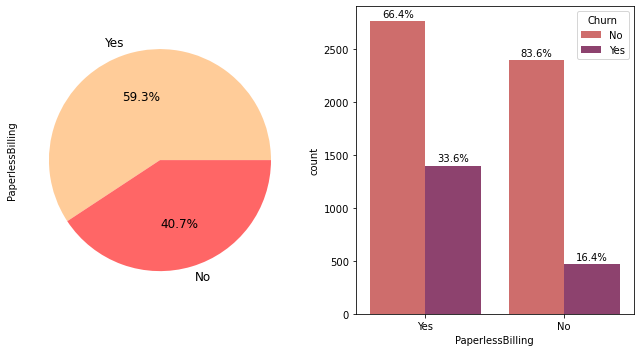

In [39]:
fig_sub_pie(df, 'PaperlessBilling')

majority user used paperless billing, but have slightly more churn rate too.

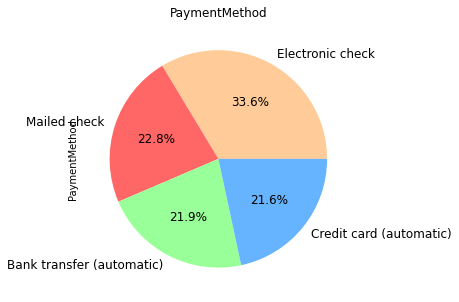

In [40]:
fig_piechart(df, 'PaymentMethod')

payment method distributed pretty well, electronic check slightly have bigger count.

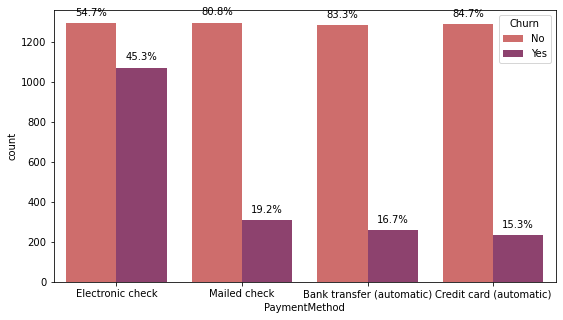

In [41]:
fig_countplot_yn(df, 'PaymentMethod')

yet being slightly larger count than other, electronic check has biggest churn rate of 45,3% while other has only under 20% churn rate.

from all feature listed, we clearly can see what features effecting churn rate and whats dont. for example, tenure seems correlated well with churn because there's slightly visible imbalance of tenure who churn vs tenure who don't. other example of correlated well with churn is senior citizen, where there're more churn ratio on senior citizen the customer who are not senior citizen. In other hand, feature like gender seems not correlated well with churn rate, there're no visbile difference in count of each gender who tend to churn. With this as assumption, we also can measure the correlation with correlation matrix.

## Correlation Heatmap

correlation for every feature each other:

<AxesSubplot:>

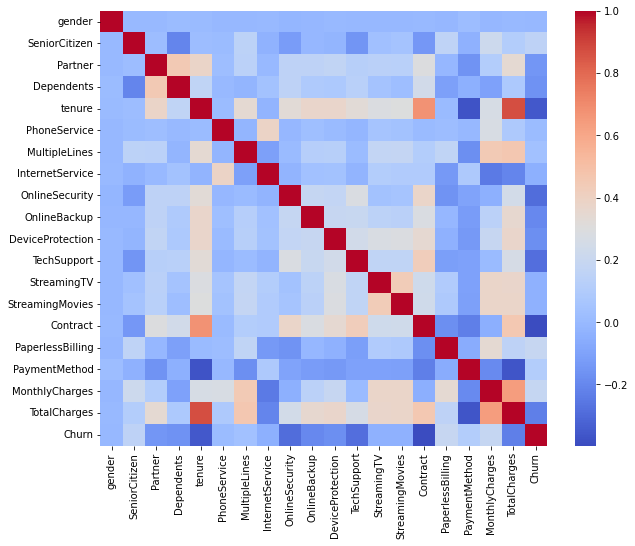

In [42]:
df_copy = df.copy()

# temporary convert y/n categorical to 0 or 1
cat = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for i in cat:
    df_copy[i].replace(to_replace='Yes', value=1, inplace=True)
    df_copy[i].replace(to_replace='No', value=0, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy = df_copy.apply(LabelEncoder().fit_transform)

fig = plt.figure(figsize=(10, 8))
fig.set_facecolor('white')

feature_corr = df_copy.corr()
sns.heatmap(feature_corr, annot=False, cmap='coolwarm')

from the heatmap above, feature that highly correlated shown by darker red (positively highly correlated) or darker blue (negatively highly correlated). we can see tenure is highly correlated to totalcharges, churn, payment method, etc.

lets focus on feature correlation with churn

<AxesSubplot:>

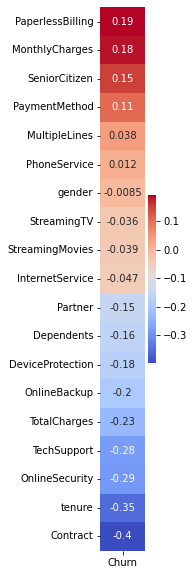

In [43]:
fig = plt.figure(figsize=(1,10))
fig.set_facecolor('white')
sns.heatmap(df_copy.corr()[['Churn']].sort_values('Churn', ascending=False)[1:], annot=True, cmap="coolwarm")

we can see that the most positive correlated with churn is PaperlessBilling, MonthlyCharges, and SeniorCitizen. and the most negatively correlated with churn is Contract, tenure, and OnlineSecurity. we've predict some of this before on our data analysis by ploting.

now lets sort the correlation value. we will make the number absolute (negative to positive) and sort it from highest correlation 

In [44]:
df_copy.corr().abs()['Churn'].sort_values(ascending = False)

Churn               1.000000
Contract            0.396150
tenure              0.354049
OnlineSecurity      0.289050
TechSupport         0.282232
TotalCharges        0.230843
OnlineBackup        0.195290
PaperlessBilling    0.191454
MonthlyCharges      0.182989
DeviceProtection    0.177883
Dependents          0.163128
SeniorCitizen       0.150541
Partner             0.149982
PaymentMethod       0.107852
InternetService     0.047097
StreamingMovies     0.038802
MultipleLines       0.038043
StreamingTV         0.036303
PhoneService        0.011691
gender              0.008545
Name: Churn, dtype: float64

# FEATURE SELECTION AND PREPROCESSING

## Feature Selection
after analyze our data and see the correlation of feature to target (churn) lets select the most correlated feature. here, i choose the feature below:

In [45]:
feat = ['Churn', 'Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'TotalCharges', 'OnlineBackup', 'PaperlessBilling', 'MonthlyCharges', 'DeviceProtection', 'Dependents', 'SeniorCitizen', 'Partner', 'PaymentMethod']
df_clean = df[feat]
df_clean.head()

,Churn,Contract,tenure,OnlineSecurity,TechSupport,TotalCharges,OnlineBackup,PaperlessBilling,MonthlyCharges,DeviceProtection,Dependents,SeniorCitizen,Partner,PaymentMethod
0,No,Month-to-month,1,No,No,29.85,Yes,Yes,29.85,No,No,0,Yes,Electronic check
1,No,One year,34,Yes,No,1889.50,No,No,56.95,Yes,No,0,No,Mailed check
2,Yes,Month-to-month,2,Yes,No,108.15,Yes,Yes,53.85,No,No,0,No,Mailed check
3,No,One year,45,Yes,Yes,1840.75,No,No,42.30,Yes,No,0,No,Bank transfer (automatic)
4,Yes,Month-to-month,2,No,No,151.65,No,Yes,70.70,No,No,0,No,Electronic check


## Preprocessing
from the data, we need to preprocess few things before feeding it to the model, here's some things we need to do:
- Encode Categorical feature
- Check outlier and scale numerical feature
- Handling skewness on target (Churn)

In [46]:
# encode categorical feature

# encode yes to 1 and no to 0
cat = ['Churn', 'Partner', 'Dependents', 'PaperlessBilling']
for i in cat:
    df_clean[i].replace(to_replace='Yes', value=1, inplace=True)
    df_clean[i].replace(to_replace='No', value=0, inplace=True)

# label encode rest of categorical data
from sklearn.preprocessing import LabelEncoder
df_clean = df_clean.apply(LabelEncoder().fit_transform)

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


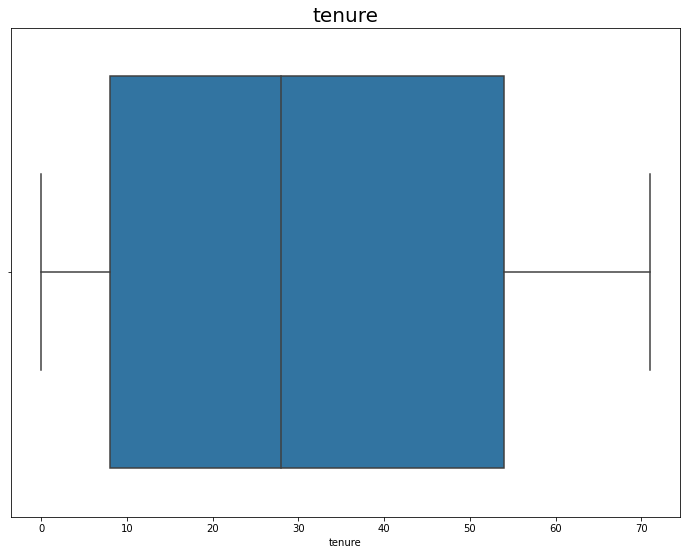

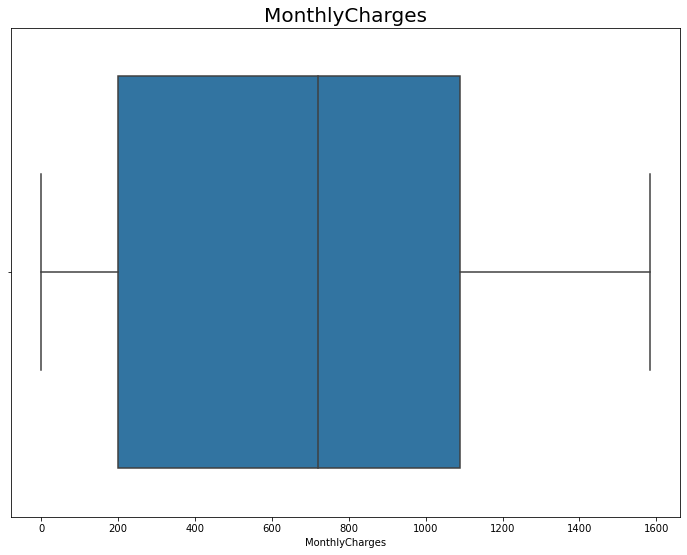

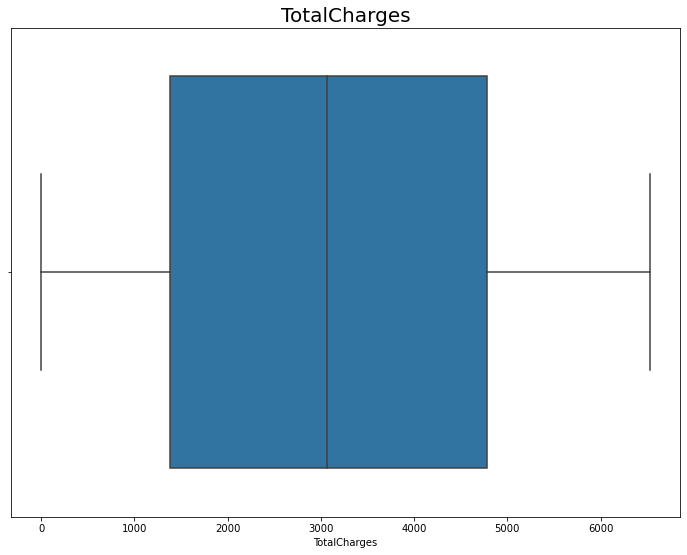

In [48]:
# check outlier on numerical feature
for col in charges:
    fig_boxplot(df_clean, col)

no outlier, however out of scale, lets scale it.

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_clean[charges] = scaler.fit_transform(df_clean[charges])
df_clean.head()


,Churn,Contract,tenure,OnlineSecurity,TechSupport,TotalCharges,OnlineBackup,PaperlessBilling,MonthlyCharges,DeviceProtection,Dependents,SeniorCitizen,Partner,PaymentMethod
0,0,0,0.000000,0,0,0.011334,2,1,0.089703,0,0,0,1,2
1,0,1,0.464789,2,0,0.555062,0,0,0.313961,2,0,0,0,3
2,1,0,0.014085,2,0,0.082095,2,1,0.274795,0,0,0,0,3
3,0,1,0.619718,2,2,0.546791,0,0,0.168035,2,0,0,0,0
4,1,0,0.014085,0,0,0.103232,0,1,0.459886,0,0,0,0,2


now they're on the same scale (0-1)

In [50]:
# handling skewness on churn
zero  = df_clean[df_clean['Churn']==0]
one = df_clean[df_clean['Churn']==1]

from sklearn.utils import resample
# upsample minority (churn yes/one)
upsample = resample(one, replace = True, n_samples = 5000) 
df_clean = pd.concat([zero, upsample])

from sklearn.utils import shuffle
df_clean = shuffle(df_clean)

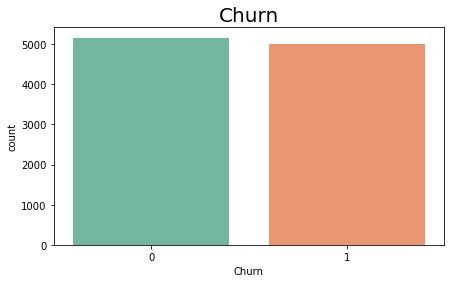

In [51]:
fig_countplot(df_clean, 'Churn', False)

# TRAIN TEST SPLIT
split dataset to train:test 7:3

In [1]:
from sklearn.model_selection import train_test_split
y = df_clean.Churn
x = df_clean.drop('Churn', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

NameError: name 'df_clean' is not defined

# MODEL BUILDING
we will use these algorithm:
1. logistic regression
2. decision tree
3. support vector machine (svm)
4. xg boost
5. adaboost
6. random forest

In [53]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [54]:
# list model name and accuracies
models = []
accuracies = []

In [55]:
def fig_roc_curve(model, model_name): 
    y_prob = model.predict_proba(x_test)[:,1]
    fp, tp, treshold = roc_curve(y_test, y_prob)

    fig = plt.figure(figsize=(10,9)) 
    fig.set_facecolor('white')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, label=model ,color = "r")
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name + ' ROC Curve',fontsize=16)
    plt.show()

## 1. Logistic Regression

Accuracy =  0.7533617579534273 

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1540
           1       0.73      0.79      0.76      1509

    accuracy                           0.75      3049
   macro avg       0.75      0.75      0.75      3049
weighted avg       0.75      0.75      0.75      3049

Confusion Matrix: 
 [[1108  432]
 [ 320 1189]]


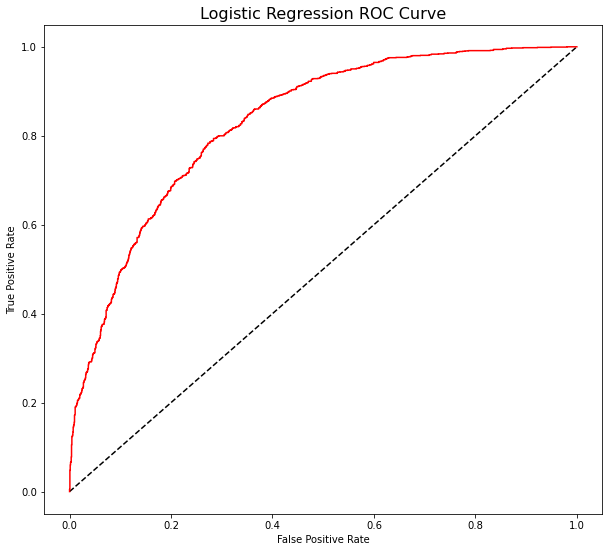

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Logistic Regression'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

## 2. Decision Tree

Accuracy =  0.8550344375204986 

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1540
           1       0.81      0.92      0.86      1509

    accuracy                           0.86      3049
   macro avg       0.86      0.86      0.85      3049
weighted avg       0.86      0.86      0.85      3049

Confusion Matrix: 
 [[1213  327]
 [ 115 1394]]


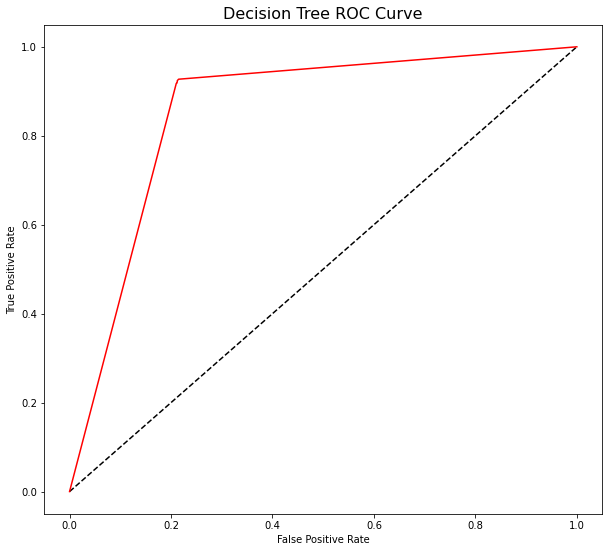

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Decision Tree'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

## 3. Suport Vector Machine (SVM)

In [58]:
from sklearn import svm
svmc = svm.SVC()
model = svmc.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)

model_name = 'SVM'
models.append(model_name)
accuracies.append(acc)

Accuracy =  0.7527058051820269 

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1540
           1       0.72      0.81      0.76      1509

    accuracy                           0.75      3049
   macro avg       0.76      0.75      0.75      3049
weighted avg       0.76      0.75      0.75      3049

Confusion Matrix: 
 [[1071  469]
 [ 285 1224]]


## 4. XG Boost

Accuracy =  0.8425713348638898 

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1540
           1       0.80      0.91      0.85      1509

    accuracy                           0.84      3049
   macro avg       0.85      0.84      0.84      3049
weighted avg       0.85      0.84      0.84      3049

Confusion Matrix: 
 [[1194  346]
 [ 134 1375]]


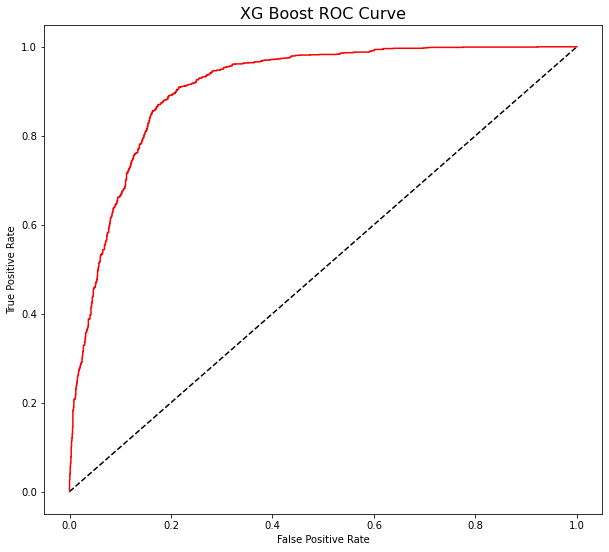

In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
model = xgb.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'XG Boost'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

## 5. Adaboost

Accuracy =  0.7536897343391276 

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1540
           1       0.73      0.80      0.76      1509

    accuracy                           0.75      3049
   macro avg       0.76      0.75      0.75      3049
weighted avg       0.76      0.75      0.75      3049

Confusion Matrix: 
 [[1097  443]
 [ 308 1201]]


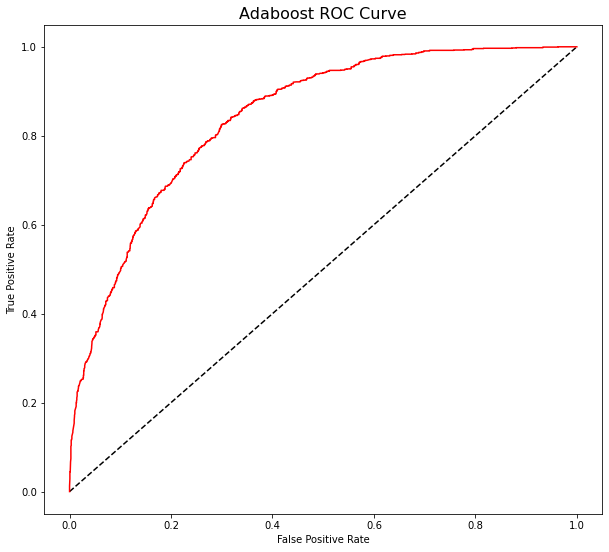

In [60]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
model = adb.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Adaboost'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

## 6. Random Forest

Accuracy =  0.8783207609052148 

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1540
           1       0.83      0.94      0.88      1509

    accuracy                           0.88      3049
   macro avg       0.88      0.88      0.88      3049
weighted avg       0.88      0.88      0.88      3049

Confusion Matrix: 
 [[1258  282]
 [  89 1420]]


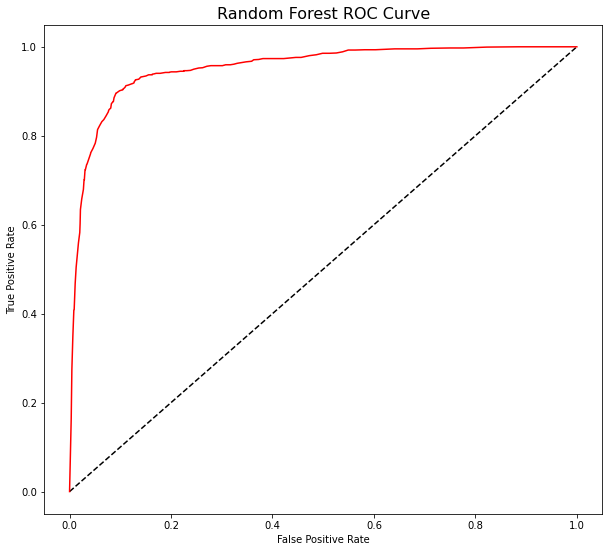

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Random Forest'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# MODEL COMPARASION

In [62]:
df_model = pd.DataFrame(list(zip(models, accuracies)), columns=['model', 'acc'])
df_model = df_model.sort_values(by='acc', ascending=False)

In [63]:
print(df_model)

                 model       acc
5        Random Forest  0.878321
1        Decision Tree  0.855034
3             XG Boost  0.842571
4             Adaboost  0.753690
0  Logistic Regression  0.753362
2                  SVM  0.752706


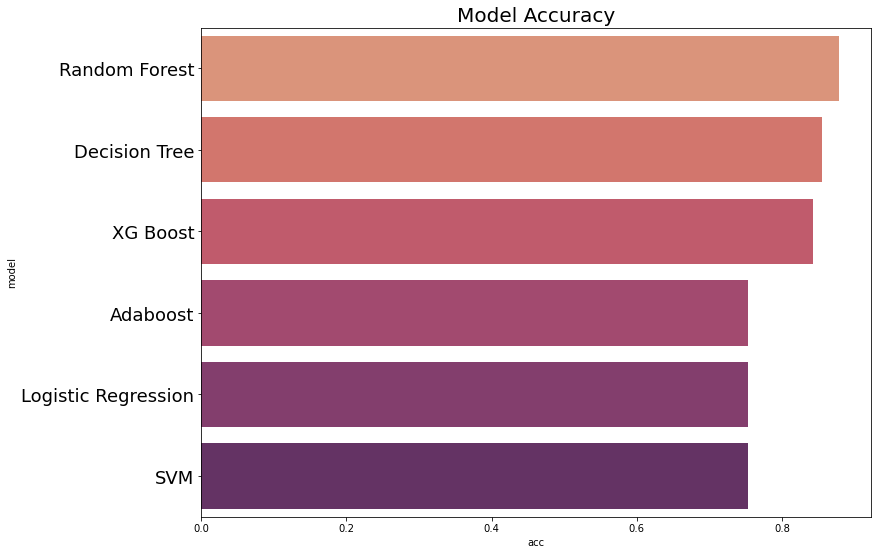

In [64]:
fig = plt.figure(figsize=(12,9))
fig.set_facecolor('white')
ax = sns.barplot(data=df_model, x='acc', y='model', palette='flare')
ax.set_title('Model Accuracy', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
plt.show()

highest accuracy by Random forest with 88% and lowest by Logistic Regression with 75%

# CONCLUSION

We've implemented Churn Prediction with several machine learning algorithm resulting in accuracy of 75-88%

some sources help me build this project:
https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn